<a href="https://colab.research.google.com/github/larrygoyeau/Lanit-Tercom/blob/master/%D0%90%D1%80%D1%85%D0%B8%D1%82%D0%B5%D0%BA%D1%82%D1%83%D1%80%D1%8B_GOYEAU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В данном задании мы познакомимся с архитектурами *AlexNet*, *VGG* и *Inception* и для каждой из этих моделей будем использовать технику **Transfer Learning**.  

* **Transfer Learning** - это процесс дообучения на **новых данных** какой-либо нейросети, уже обученной до этого на других данных, обычно на каком-нибудь хорошем, большом (миллионы картинок) датасете (например, [ImageNet](http://www.image-net.org/) ~ 14 млн картинок).

<h2 style="text-align: center;"><b>AlexNet</b></h2>

**AlexNet** - нейронная сеть, которая победила в ILSVRC (соревнование по классификации картинок из ImageNet) в 2012 году и стала основой для многих других архитектур. Впервые она была представлена в статье  “ImageNet Classification with Deep Convolutional Neural Networks”, над которой работал Джоффри Хинтон - человек, которого многие называют отцом современного computer vision.

Архитектура описана на картинке ниже

<img src="https://www.learnopencv.com/wp-content/uploads/2018/05/AlexNet-1.png">

**AlexNet** состоит из 5 **сверточных** слоев, 3 **MaxPool** слоев и 2 **FullyConnected** слоев в конце. Обратите внимание, что в последнем пулинг слое окна, из которых берется максимум, пересекаются за счет того, что *stride*=2. Это изменение по сравнению с традиционным пулингом помогло снизить ошибку на 0.4%.

По сути **AlexNet** это самая базовая архитектура для сверточной сети после LeNet.

<h2 style="text-align: center;"><b>VGG</b></h3>

Один **сверточный** слой с фильтром 5$\times$5 можно заменить двумя подряд идущими слоями с фильтрами размером 3$\times$3, так как **воспринимаемая область** картинки у них будет одинаковой. При этом уменьшиться количество параметров, поэтому такую сеть будет легче обучать. 

На момент создания VGG люди уже заметили, что чем больше слоев в нейросети, тем выше ее точность. Заменяя большие фильтры на несколько фильтров 3$\times$3 исследователи получили глубокую нейросеть с меньшим количеством параметров. Архитектура VGG-16 (версии VGG с 16 слоями) представлена на картинке ниже:


<img src="https://cdn-images-1.medium.com/max/1040/1*0Tk4JclhGOCR_uLe6RKvUQ.png">

Когда говорят **VGG**, то чаще всего имеют ввиду **VGG-16** или **VGG-19**. Более глубоких версий **VGG** нет, так как после 19 слоев точность начинает падать.


<h2 style="text-align: center;"><b>Inception v1</b></h3>

### Рассмотрим идею, которая подтолкнула исследователей к созданию этой архитектуры.

Площадь, которую занимает классифицируемый объект, может очень сильно отличаться. Пример на картинке ниже: 

<img src="https://cdn-images-1.medium.com/max/1040/1*aBdPBGAeta-_AM4aEyqeTQ.jpeg">

* Для извлечения информации с большой площади лучше всего подходят **большие** фильтры, и наоборот для маленьких объектов лучше **маленькие** фильтры. 
* Глубокие нейронные сети намного сложнее обучать: в них появляется проблема **затухания градиента** и они **переобучаются**.
Чтобы решить первую проблему исследователи придумали **Incepton** модуль, который применяет фильтры разного размера и затем склеивает полученные каналы. При этом извлекается как информация из больших объектов, так и из маленьких. Простейшая реализация модуля выглядит так:
<img src="https://cdn-images-1.medium.com/max/1040/1*DKjGRDd_lJeUfVlY50ojOA.png">

Реализацию можно сделать более эффективной, если сначала уменьшить количество каналов с помощью **сверточного слоя** 1$\times$1 и лишь затем применить **слой** с фильтрами 5$\times$5. Сокращение вычислений происходит за счет того, что мы сначала **уменьшаем размерность** данных и лишь затем преобразовываем их. Продвинутая реализация:
<img src="https://cdn-images-1.medium.com/max/1040/1*U_McJnp7Fnif-lw9iIC5Bw.png">

Сеть состоит из **корня** (нескольких сверточных слоев) и **Inception** модулей идущих за ним. Оранжевым прямоугольников выделен корень, а фиолетовыми - **вспомогательные классификаторы**. Именно они помогают бороться с переобучением. Наша функция потерь - взвешенная сумма **LogLoss** на двух **вспомогательных классификаторах** и **основном** в конце нейронной сети.

<img src="https://cdn-images-1.medium.com/max/1040/1*uW81y16b-ptBDV8SIT1beQ.png">

<h2 style="text-align: center;"><b>Transfer Learning</b></h3>

Теперь мы перейдем к тому, как можно использовать уже обученные нейросети, чтобы ускорить свою работу.


Общая архитектура CNN:

С помощью операций *свёртки (convolution)* и *пулинга (pooling)* всё, что расположено до этапа *classification*, по сути **извлекает признаки из объектов, подающихся на вход** (картинок, в данном случае). То есть вместо того, чтобы самим пытаться как-то описать картинки для хорошей работы классификатора, мы предоставляем заняться этим нейросети (обучая её методом обратного распространения ошибки).

<h2 style="text-align: center;"><b>Описание метода</b></h3>

Представим теперь, что eсть свой набор данных, и нужно научить сеть классифицировать объекты из нашей выборки.  


* **Один из методов - CNN, которую можно дообучить (Fine Tuning)**  

    * Берём сетку, обученную на ImageNet  
    * Убираем последние Fully-Connected слои сети, отвечающие за классификацию.  
    * Теперь всё же *распространяем backpropagation ещё на сколько-то слоёв назад (размораживаем веса в этих слоях)*, чтобы скорректировать их под новые данные. Можно распространить обучение и на всю сеть, но часто первые слои всё же замораживают, поскольку они (как ожидается) извлекают более общие признаки. А ещё обучать всю сеть всё же дольше, чем несколько слоёв. Всё зависит от того, какого качества хотим добиться
    * Теперь сеть выдаёт не метки классов, а то, что поступало на вход Fully-Connected (веса последних (или всех) слоёв были изменены под наши данные)
    * Обучаем на этих признаках какой-либо классификатор (свою Fully-Connected сеть, например)
    * Теперь у нас есть сеть, работающая хорошо на нашем датасете



In [ ]:
!pip install torch torchvision

In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os


### В чём состоит задание

Вам предстоит попробовать использовать  типа архитектур свёрточных нейросетей - **AlexNet (сделано в примере), VGG16, Inception_v3**

**Для каждого пункта нужно:**
- вывести график loss'а на обучающей и на валидационной выборке
- вывести качество модели (accuracy)

### Данные  

В данном задании используются сети (из библиотеки **torchvision**), предобученные на датасете ImageNet.  
В качестве новых данных будет датасет Меравьи vs Пчёлы, *являющийся частью датасета ImageNet*. В нём 400 картинок, ~250 обучение и ~150 валидация (тест).

In [ ]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip

--2020-07-30 08:13:27--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.225.103.126, 13.225.103.91, 13.225.103.61, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.225.103.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip.3’

hymenoptera_data.zi 100%[===================>]  45.10M   151MB/s    in 0.3s    

2020-07-30 08:13:27 (151 MB/s) - ‘hymenoptera_data.zip.3’ saved [47286322/47286322]



In [ ]:
!apt install unzip
!unzip -o hymenoptera_data.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Archive:  hymenoptera_data.zip
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inflating: hymenoptera_data/train/ants/1286984635_5119e80de1.jpg  
  inflating: hy

### Функции для отрисовки и обучения модели:

* Загрузим данные:

In [ ]:
# Преобразование обучающих данных для расширения обучающей выборки и её нормализация
# Для валидационной (тестовой) выборки только нормализация
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(244),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(244),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
# папка с данными
data_dir = './hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
# специальный класс для загрузки данных в виде батчей
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                              shuffle=True, num_workers=4)
               for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

use_gpu = torch.cuda.is_available()

In [ ]:
for i,j in dataloaders['val']:
  print(j)

tensor([1, 0, 1, 1])
tensor([1, 0, 0, 1])
tensor([1, 1, 0, 0])
tensor([0, 0, 1, 1])
tensor([0, 0, 0, 1])
tensor([0, 0, 0, 1])
tensor([0, 1, 1, 1])
tensor([1, 0, 1, 1])
tensor([1, 1, 1, 0])
tensor([0, 0, 0, 1])
tensor([1, 1, 1, 1])
tensor([0, 0, 0, 1])
tensor([1, 1, 1, 1])
tensor([1, 0, 0, 0])
tensor([0, 1, 0, 1])
tensor([0, 1, 0, 0])
tensor([1, 1, 1, 0])
tensor([0, 0, 0, 1])
tensor([1, 0, 1, 1])
tensor([0, 0, 0, 1])
tensor([1, 0, 0, 1])
tensor([1, 0, 1, 0])
tensor([1, 0, 0, 1])
tensor([0, 1, 1, 0])
tensor([0, 0, 0, 1])
tensor([0, 0, 1, 0])
tensor([0, 1, 1, 1])
tensor([0, 0, 1, 0])
tensor([1, 1, 1, 1])
tensor([0, 0, 1, 1])
tensor([1, 0, 0, 0])
tensor([0, 1, 1, 0])
tensor([0, 0, 1, 1])
tensor([0, 1, 0, 1])
tensor([1, 1, 1, 1])
tensor([1, 1, 0, 1])
tensor([1, 0, 1, 1])
tensor([1, 1, 1, 0])
tensor([1])


Размеры обучающей и валидационной выборок:

In [ ]:
print(dataset_sizes)

{'train': 244, 'val': 153}


**Вопрос (на понимание кода выше):**  
1. В DataLoader() выше стоит "shuffle=True". Для чего это нужно?
2. Сколько картинок будет в каждом батче?

**Ответ:** <ответ>

1. 'shuffle' означает, что мы случайным образом смешиваем данные, чтобы гарантировать, что каждая партия является представительной для всего учебного набора.

2. 4 картинок будет в каждом батче.

* Посмотрим на картинки из датасета:

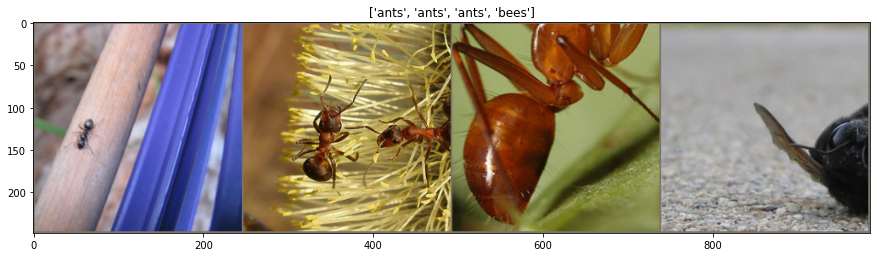

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(15, 12))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)


# Получим 1 батч (картнки-метки) из обучающей выборки
inputs, classes = next(iter(dataloaders['train']))

# Расположим картинки рядом
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
for i in dataloaders['train']:
    print(i[0][0])
    break

tensor([[[ 0.8104,  0.7762,  0.7591,  ..., -1.2445, -1.2959, -1.3130],
         [ 0.8789,  0.8618,  0.8618,  ..., -1.3130, -1.2959, -1.2788],
         [ 0.9646,  0.9817,  0.9817,  ..., -1.2617, -1.2788, -1.2788],
         ...,
         [-1.3130, -1.3302, -0.9534,  ..., -1.4500, -1.4843, -1.4672],
         [-1.2274, -1.1760, -0.8678,  ..., -1.4672, -1.5014, -1.4672],
         [-1.0733, -1.0904, -0.7822,  ..., -1.4329, -1.4672, -1.4500]],

        [[ 0.9580,  0.9230,  0.9055,  ..., -1.0028, -1.0553, -1.0728],
         [ 1.0280,  1.0105,  1.0105,  ..., -1.0728, -1.0553, -1.0378],
         [ 1.1155,  1.1331,  1.1331,  ..., -1.0203, -1.0378, -1.0378],
         ...,
         [-1.0378, -1.0728, -0.8277,  ..., -1.2479, -1.2654, -1.2654],
         [-0.9853, -0.9853, -0.7752,  ..., -1.2654, -1.2829, -1.2479],
         [-0.9328, -0.8978, -0.6176,  ..., -1.2304, -1.2479, -1.2304]],

        [[ 1.1759,  1.1411,  1.1237,  ..., -1.1944, -1.2293, -1.2641],
         [ 1.2457,  1.2282,  1.2282,  ..., -1

### Обучение моделей

Следующая функция будет использоваться для обучения модели. Аргументы:  
* model $-$ нейросеть
* loss $-$ оптимизируемая функция (criterion, cost function, objective)
* optimizer $-$ оптимизационный алгоритм
* scheduler $-$ политика изменения learning_rate
* num_epochs $-$ количество итераций обучения

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0
    
    losses = {'train': [], 'val': []}

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # каждя эпоха имеет обучающую и тестовую стадии
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train(True)  # установаить модель в режим обучения
            else:
                model.train(False)  # установить модель в режим предсказания

            running_loss = 0.0
            running_corrects = 0

            # итерируемся по батчам
            for data in dataloaders[phase]:
                # получаем картинки и метки
                inputs, labels = data

                # оборачиваем в переменные
                if use_gpu:
                    inputs = inputs.cuda()
                    labels = labels.cuda()
                else:
                    inputs, labels = inputs, labels

                # инициализируем градиенты параметров
                optimizer.zero_grad()

                # forward pass
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)

                # backward pass + оптимизируем только если это стадия обучения
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # статистика
                running_loss += loss.item()
                running_corrects += int(torch.sum(preds == labels.data))

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]
            
            losses[phase].append(epoch_loss)
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # если достиглось лучшее качество, то запомним веса модели
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # загрузим лучшие веса модели
    model.load_state_dict(best_model_wts)
    return model, losses

* Функция для отрисовки тестовых изображений и предсказаний для них:

In [ ]:
def visualize_model(model, num_images=6):
    images_so_far = 0
    fig = plt.figure()

    for i, data in enumerate(dataloaders['val']):
        inputs, labels = data
        if use_gpu:
            inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        else:
            inputs, labels = Variable(inputs), Variable(labels)

        outputs = model(inputs)
        _, preds = torch.max(outputs.data, 1)

        for j in range(inputs.size()[0]):
            images_so_far += 1
            ax = plt.subplot(num_images // 2, 2, images_so_far)
            ax.axis('off')
            ax.set_title('predicted: {}'.format(class_names[preds[j]]))
            imshow(inputs.cpu().data[j])

            if images_so_far == num_images:
                return

* Функция для измерения точности модели на валидационном датасете

In [ ]:
def evaluate(model):
    model.train(False)
    
    runninig_correct = 0
    for data in dataloaders['val']:
        # получаем картинки и метки
        inputs, labels = data
        
        # переносим на gpu, если возможно
        if use_gpu:
            inputs = inputs.cuda()
            labels = labels.cuda()
            
        # forard pass
        output = model(inputs)
        _, predicted = torch.max(output, 1)
        print(torch.sum(predicted == labels))
        
        runninig_correct += int(torch.sum(predicted == labels))
        
    return runninig_correct / dataset_sizes['val']

### AlexNet

Загрузка модели:

In [ ]:
model = models.alexnet(pretrained=True)

Посмотрим, что внутри:

In [ ]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Видим, что на вход классификатору (classifier) подаётся *9216 признаков*. Это и будет размер входа для нашего нового классификатора.

Сконфигурируем - изменим FC-слой и зададим *cost function* и *оптимизирующий алгоритм*:

(*по умолчанию backpropagation распространяется на все слои, поэтому здесь мы только заменяем FC-слой на свой классификатор*)

In [ ]:
# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 9216
# Заменяем Fully-Connected слой на наш линейный классификатор
model.classifier = nn.Linear(num_features, 2)

# Использовать ли GPU
if use_gpu:
    model = model.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# В качестве оптимизатора - стохастический градиентный спуск
optimizer_ft = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Умножает learning_rate на 0.1 каждые 7 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
model, losses = train_model(model, loss_fn, optimizer_ft, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train Loss: 0.3152 Acc: 0.5492
val Loss: 0.1730 Acc: 0.5817

Epoch 1/24
----------
train Loss: 0.2574 Acc: 0.5328
val Loss: 0.1761 Acc: 0.5163

Epoch 2/24
----------
train Loss: 0.1701 Acc: 0.5533
val Loss: 0.1673 Acc: 0.5948

Epoch 3/24
----------
train Loss: 0.1759 Acc: 0.5328
val Loss: 0.1758 Acc: 0.5621

Epoch 4/24
----------
train Loss: 0.1740 Acc: 0.5287
val Loss: 0.1739 Acc: 0.5882

Epoch 5/24
----------
train Loss: 0.1737 Acc: 0.5820
val Loss: 0.1701 Acc: 0.6013

Epoch 6/24
----------
train Loss: 0.1699 Acc: 0.5943
val Loss: 0.1699 Acc: 0.6078

Epoch 7/24
----------
train Loss: 0.1692 Acc: 0.5697
val Loss: 0.1684 Acc: 0.6078

Epoch 8/24
----------
train Loss: 0.1700 Acc: 0.5697
val Loss: 0.1671 Acc: 0.6078

Epoch 9/24
----------
train Loss: 0.1687 Acc: 0.6025
val Loss: 0.1678 Acc: 0.6144

Epoch 10/24
----------
train Loss: 0.1692 Acc: 0.6066
val Loss: 0.1678 Acc: 0.5882

Epoch 11/24
----------
train Loss: 0.1665 Acc: 0.6270
val Loss: 0.1690 Acc: 0.6013

Epoch 12/24
----------
t

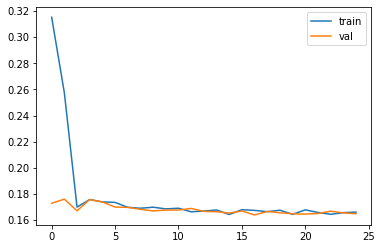

In [ ]:
# Построим график лосса при обучении и валидации

plt.plot(losses['train'],label='train')
plt.plot(losses['val'],label='val')
plt.legend()

In [ ]:
torch.save(model.state_dict(), 'AlexNet_fine_tune.pth')

In [ ]:
model.load_state_dict(torch.load('AlexNet_fine_tune.pth'))

<All keys matched successfully>

In [ ]:
print("Accuracy: {0:.4f}".format(evaluate(model)))

tensor(2, device='cuda:0')
tensor(3, device='cuda:0')
tensor(3, device='cuda:0')
tensor(2, device='cuda:0')
tensor(3, device='cuda:0')
tensor(3, device='cuda:0')
tensor(3, device='cuda:0')
tensor(3, device='cuda:0')
tensor(4, device='cuda:0')
tensor(1, device='cuda:0')
tensor(3, device='cuda:0')
tensor(2, device='cuda:0')
tensor(4, device='cuda:0')
tensor(3, device='cuda:0')
tensor(2, device='cuda:0')
tensor(3, device='cuda:0')
tensor(4, device='cuda:0')
tensor(3, device='cuda:0')
tensor(3, device='cuda:0')
tensor(2, device='cuda:0')
tensor(2, device='cuda:0')
tensor(0, device='cuda:0')
tensor(3, device='cuda:0')
tensor(0, device='cuda:0')
tensor(2, device='cuda:0')
tensor(1, device='cuda:0')
tensor(4, device='cuda:0')
tensor(4, device='cuda:0')
tensor(2, device='cuda:0')
tensor(3, device='cuda:0')
tensor(2, device='cuda:0')
tensor(3, device='cuda:0')
tensor(2, device='cuda:0')
tensor(3, device='cuda:0')
tensor(2, device='cuda:0')
tensor(1, device='cuda:0')
tensor(4, device='cuda:0')
t

### VGG16

In [ ]:
# код здесь
model_extractor = models.vgg16(pretrained=True)

In [ ]:
# код здесь

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 25088
# Заменяем Fully-Connected слой на наш линейный классификатор
model_extractor.classifier = nn.Linear(num_features, 2)

# Использовать ли GPU
if use_gpu:
    model_extractor = model_extractor.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# В качестве оптимизатора - стохастический градиентный спуск
optimizer_ft = optim.SGD(model_extractor.parameters(), lr=0.001, momentum=0.9)

# Умножает learning_rate на 0.1 каждые 7 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

model, losses = train_model(model_extractor, loss_fn, optimizer_ft, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train Loss: 0.2188 Acc: 0.5615
val Loss: 0.1674 Acc: 0.6275

Epoch 1/24
----------
train Loss: 0.1647 Acc: 0.6107
val Loss: 0.1464 Acc: 0.6797

Epoch 2/24
----------
train Loss: 0.1927 Acc: 0.5205
val Loss: 0.1744 Acc: 0.5294

Epoch 3/24
----------
train Loss: 0.1708 Acc: 0.5369
val Loss: 0.1851 Acc: 0.4641

Epoch 4/24
----------
train Loss: 0.1711 Acc: 0.5779
val Loss: 0.1557 Acc: 0.7190

Epoch 5/24
----------
train Loss: 0.1386 Acc: 0.6721
val Loss: 0.1171 Acc: 0.8105

Epoch 6/24
----------
train Loss: 0.1007 Acc: 0.8320
val Loss: 0.0874 Acc: 0.9020

Epoch 7/24
----------
train Loss: 0.0934 Acc: 0.8320
val Loss: 0.0791 Acc: 0.8954

Epoch 8/24
----------
train Loss: 0.0878 Acc: 0.8361
val Loss: 0.0779 Acc: 0.8758

Epoch 9/24
----------
train Loss: 0.0724 Acc: 0.8648
val Loss: 0.0759 Acc: 0.9020

Epoch 10/24
----------
train Loss: 0.0730 Acc: 0.8607
val Loss: 0.0749 Acc: 0.9085

Epoch 11/24
----------
train Loss: 0.0713 Acc: 0.8730
val Loss: 0.0808 Acc: 0.8954

Epoch 12/24
----------
t

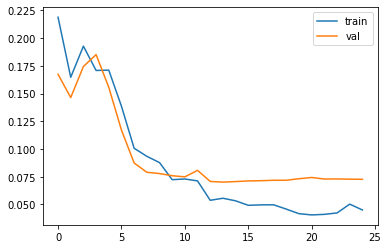

In [ ]:
# Построим график лосса при обучении и валидации

plt.plot(losses['train'],label='train')
plt.plot(losses['val'],label='val')
plt.legend()

### Inception_v3

In [ ]:
# Нужно поменять размер картинок на 299, иначе будет ошибка, так как размерность станет отрицательной.
# Это вызвано тем, что нейросеть изначально обучалась на картинках размера 299.

# Результирующий размер картинок определяется трансформациями
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(299),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(299),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Сам объект датасета
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}

# специальный класс для загрузки данных в виде батчей
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                              shuffle=True, num_workers=4)
               for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

use_gpu = torch.cuda.is_available()

In [ ]:
def train_model_inception_v3(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0
    
    losses = {'train': [], 'val': []}

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # каждя эпоха имеет обучающую и тестовую стадии
        for phase in ['train', 'val']:
            scheduler.step()
            model.train(True)  # установаить модель в режим обучения
            # установить модель в режим предсказания

            running_loss = 0.0
            running_corrects = 0

            # итерируемся по батчам
            for data in dataloaders[phase]:
                # получаем картинки и метки
                inputs, labels = data

                # оборачиваем в переменные
                if use_gpu:
                    inputs = inputs.cuda()
                    labels = labels.cuda()
                else:
                    inputs, labels = inputs, labels

                # инициализируем градиенты параметров
                optimizer.zero_grad()

                # forward pass
                if len(inputs)==4:
                  outputs = model(inputs)[0]
                  _, preds = torch.max(outputs.data, 1)
                  loss = criterion(outputs, labels)

                  # backward pass + оптимизируем только если это стадия обучения
                  if phase == 'train':
                    loss.backward()
                    optimizer.step()

                  # статистика
                  running_loss += loss.item()
                  running_corrects += int(torch.sum(preds == labels.data))

            epoch_loss = running_loss /( dataset_sizes[phase]//4*4)
            epoch_acc = running_corrects /( dataset_sizes[phase]//4*4)
            
            losses[phase].append(epoch_loss)
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # если достиглось лучшее качество, то запомним веса модели
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # загрузим лучшие веса модели
    model.load_state_dict(best_model_wts)
    return model, losses

In [ ]:
# Ваш код здесь
model_extractor = models.inception_v3(pretrained=True)

In [ ]:
# Ваш код здесь

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 2048
# Заменяем Fully-Connected слой на наш линейный классификатор
model_extractor.fc = nn.Linear(num_features, 2)

# Использовать ли GPU
if use_gpu:
    model_extractor = model_extractor.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# В качестве оптимизатора - стохастический градиентный спуск
optimizer_ft = optim.SGD(model_extractor.parameters(), lr=0.001, momentum=0.9)

# Умножает learning_rate на 0.1 каждые 7 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

model_extractor, losses = train_model_inception_v3(model_extractor, loss_fn, optimizer_ft, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train Loss: 0.1400 Acc: 0.7172
val Loss: 0.0886 Acc: 0.8289

Epoch 1/24
----------
train Loss: 0.1342 Acc: 0.7418
val Loss: 0.0868 Acc: 0.8553

Epoch 2/24
----------
train Loss: 0.1139 Acc: 0.7869
val Loss: 0.1091 Acc: 0.8158

Epoch 3/24
----------
train Loss: 0.0804 Acc: 0.8811
val Loss: 0.1080 Acc: 0.7961

Epoch 4/24
----------
train Loss: 0.0855 Acc: 0.8566
val Loss: 0.1008 Acc: 0.8158

Epoch 5/24
----------
train Loss: 0.0634 Acc: 0.8893
val Loss: 0.0754 Acc: 0.8618

Epoch 6/24
----------
train Loss: 0.0739 Acc: 0.8811
val Loss: 0.0877 Acc: 0.8684

Epoch 7/24
----------
train Loss: 0.0693 Acc: 0.9057
val Loss: 0.0906 Acc: 0.8289

Epoch 8/24
----------
train Loss: 0.0843 Acc: 0.8402
val Loss: 0.0865 Acc: 0.8553

Epoch 9/24
----------
train Loss: 0.0721 Acc: 0.8648
val Loss: 0.0841 Acc: 0.8289

Epoch 10/24
----------
train Loss: 0.0769 Acc: 0.8607
val Loss: 0.0835 Acc: 0.8816

Epoch 11/24
----------
train Loss: 0.0714 Acc: 0.8893
val Loss: 0.1084 Acc: 0.8224

Epoch 12/24
----------
t

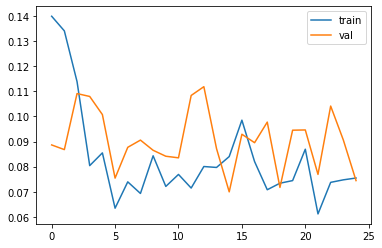

In [ ]:
# Построим график лосса при обучении и валидации

plt.plot(losses['train'],label='train')
plt.plot(losses['val'],label='val')
plt.legend()

**Вопрос:** Какая из сетей оказалась наилучшей? Как думаете, почему?

**Ответ:** 

VGG16 получил самую высокую точность валидатион с 0.92

Мы можем считать, что VGG16 - лучшая модель для нашей задачи.